In [36]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import math
import random

In [37]:
y = torch.tensor([[random.uniform(-1,1) for _ in range(5)] for _ in range(5)])
y_hat1 = torch.tensor([[random.uniform(-1,1) for _ in range(5)] for _ in range(5)])
y_hat2 = torch.tensor([[random.uniform(-1,1) for _ in range(5)] for _ in range(5)])

In [38]:
y

tensor([[ 0.9502,  0.3249,  0.1046, -0.5830,  0.5382],
        [-0.5722, -0.7821,  0.2562,  0.3731, -0.2288],
        [-0.6229, -0.4932, -0.4104,  0.4971, -0.3963],
        [ 0.2224,  0.0449,  0.9748, -0.0567,  0.0360],
        [-0.4666, -0.2912,  0.7198,  0.8341,  0.5134]])

In [39]:
y_hat1

tensor([[-0.8606,  0.5009, -0.0752,  0.0440, -0.5374],
        [ 0.8447,  0.1780, -0.3972,  0.5538,  0.2526],
        [ 0.3745,  0.3091, -0.5996, -0.3342, -0.9431],
        [ 0.0583, -0.2235, -0.2145, -0.1232,  0.5406],
        [ 0.0488,  0.5234, -0.1976, -0.8691, -0.2349]])

In [40]:
y_hat2

tensor([[-0.6374,  0.6311,  0.5968, -0.8559,  0.2754],
        [-0.5760,  0.5544, -0.1516,  0.6198, -0.6075],
        [ 0.5725,  0.9771,  0.0730, -0.0070,  0.6653],
        [-0.4892, -0.3212,  0.8014, -0.6269, -0.5846],
        [-0.0944, -0.0203, -0.6810, -0.9409, -0.4528]])

In [41]:
criterion = nn.KLDivLoss()
loss1 = criterion(y,y_hat1)
loss2 = criterion(y,y_hat2)
print('loss 1 : {}'.format(loss1))
print('loss 2 : {}'.format(loss2))

F:\Anaconda\envs\deepl\lib\site-packages\torch\nn\functional.py:2398: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn("reduction: 'mean' divides the total loss by both the batch size and the support size."


loss 1 : -0.09833110868930817
loss 2 : -0.0968465507030487


In [7]:
class DiceLoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(DiceLoss, self).__init__()

    def forward(self, inputs, targets, smooth=1):
        
        #comment out if your model contains a sigmoid or equivalent activation layer
        # inputs = F.sigmoid(inputs)       
        
        #flatten label and prediction tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)
        
        intersection = (inputs * targets).sum()                            
        dice = (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth)  
        
        return 1 - dice

In [43]:
criterion = DiceLoss()
loss1 = criterion(y,y_hat1)
loss2 = criterion(y,y_hat2)
print('loss 1 : {}'.format(loss1))
print('loss 2 : {}'.format(loss2))

loss 1 : 5.215019226074219
loss 2 : 2.4658799171447754


In [15]:
anchor = torch.randn(100, 128, requires_grad=True)

In [16]:
anchor

tensor([[-0.8677, -0.8928,  0.2799,  ..., -1.4881,  1.0726, -1.1159],
        [ 2.6298,  2.0846,  1.6118,  ..., -0.5865,  0.2716, -0.3736],
        [-0.7671,  0.4672, -0.3905,  ...,  0.6298, -0.5888, -0.0464],
        ...,
        [ 0.0485, -0.9030, -1.1079,  ...,  0.5373, -0.9645,  0.2447],
        [-1.0917, -0.7731,  2.3227,  ...,  0.8215,  0.7577, -0.8133],
        [ 0.4787, -0.2534,  1.3955,  ..., -0.4374, -1.5205,  0.6001]],
       requires_grad=True)

In [3]:
model = RobertaForSequenceClassification(MODEL_NAME,24)

In [14]:
model.bert.encoder.layer[0]

RobertaLayer(
  (attention): RobertaAttention(
    (self): RobertaSelfAttention(
      (query): Linear(in_features=768, out_features=768, bias=True)
      (key): Linear(in_features=768, out_features=768, bias=True)
      (value): Linear(in_features=768, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (output): RobertaSelfOutput(
      (dense): Linear(in_features=768, out_features=768, bias=True)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )
  (intermediate): RobertaIntermediate(
    (dense): Linear(in_features=768, out_features=3072, bias=True)
  )
  (output): RobertaOutput(
    (dense): Linear(in_features=3072, out_features=768, bias=True)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
)

In [26]:
model.bert.encoder.layer[0].attention.self.query

Linear(in_features=768, out_features=768, bias=True)

In [15]:
list(model.bert.encoder.layer[0].attention.self.value.parameters())

[Parameter containing:
 tensor([[ 0.0013,  0.0397,  0.0352,  ...,  0.0087, -0.0279,  0.0172],
         [ 0.0298,  0.0487, -0.0277,  ..., -0.0174,  0.0145,  0.0212],
         [ 0.0028, -0.0338, -0.0392,  ...,  0.0202, -0.0394,  0.0125],
         ...,
         [-0.0269,  0.0373, -0.0087,  ..., -0.0152, -0.0086, -0.0107],
         [-0.0309, -0.0189, -0.0469,  ...,  0.0455, -0.0070,  0.0312],
         [ 0.0212,  0.0141,  0.0004,  ..., -0.0121, -0.0122,  0.0239]],
        requires_grad=True),
 Parameter containing:
 tensor([-2.1704e-02,  4.6958e-03,  1.1399e-02, -1.5390e-02,  8.7822e-03,
         -9.4673e-03,  3.5090e-03, -1.5868e-02,  2.0370e-02,  7.9437e-03,
          5.1930e-04, -1.3330e-02,  7.3201e-03, -3.3357e-04,  4.9465e-03,
         -1.1159e-03,  8.3455e-03, -1.4708e-02, -1.4520e-02, -7.2312e-03,
          3.1131e-02, -1.7900e-03,  1.9223e-02, -6.0176e-03,  3.2437e-03,
         -5.6747e-04,  5.4753e-03,  1.9259e-02, -1.6914e-03,  1.5346e-04,
          2.0017e-02,  2.0931e-02,  1.89

In [25]:
count = 0
for para in model.bert.encoder.layer[0].attention.self.query.parameters():
    print(para)
    print(para.size())
    print('---------para size------------')
    print(len(para))
    print('----------para[0]-----------')
    print(para[0])
    print('----------para[0] size-----------')
    print(para[0].size())
    count += 1
print(count)

Parameter containing:
tensor([[ 0.0149,  0.0202,  0.0302,  ...,  0.0057, -0.0113, -0.0225],
        [-0.0569,  0.0186,  0.0062,  ...,  0.0121, -0.0153,  0.0126],
        [ 0.0135, -0.0128,  0.0405,  ..., -0.0384,  0.0373, -0.0279],
        ...,
        [ 0.0521,  0.0021, -0.0508,  ...,  0.0534, -0.0321,  0.0261],
        [ 0.0779,  0.0410,  0.0308,  ...,  0.0647,  0.0165,  0.0415],
        [-0.0381, -0.0468,  0.0601,  ..., -0.0421, -0.0078, -0.0436]],
       requires_grad=True)
torch.Size([768, 768])
---------para size------------
768
----------para[0]-----------
tensor([ 1.4851e-02,  2.0216e-02,  3.0197e-02, -1.2674e-02, -4.5563e-02,
        -1.0461e-02, -6.5851e-02, -4.9709e-03,  7.8242e-03, -3.6613e-02,
        -6.8234e-03, -5.2694e-03,  7.2968e-03,  9.6949e-03, -1.7261e-02,
         2.2025e-02, -2.8250e-02,  6.6066e-02, -2.3844e-02,  3.1265e-02,
         8.7972e-03, -4.3364e-03,  1.7785e-02,  3.7758e-02,  1.5733e-02,
        -2.1217e-02, -4.4960e-02,  8.0965e-03, -3.3140e-02, -3.70

In [58]:
x = list(model.bert.encoder.layer[0].attention.self.query.parameters())[0].data
x

tensor([[ 0.0149,  0.0202,  0.0302,  ...,  0.0057, -0.0113, -0.0225],
        [-0.0569,  0.0186,  0.0062,  ...,  0.0121, -0.0153,  0.0126],
        [ 0.0135, -0.0128,  0.0405,  ..., -0.0384,  0.0373, -0.0279],
        ...,
        [ 0.0521,  0.0021, -0.0508,  ...,  0.0534, -0.0321,  0.0261],
        [ 0.0779,  0.0410,  0.0308,  ...,  0.0647,  0.0165,  0.0415],
        [-0.0381, -0.0468,  0.0601,  ..., -0.0421, -0.0078, -0.0436]])

In [59]:
y = list(model.bert.encoder.layer[1].attention.self.query.parameters())[0].data
y

tensor([[-0.0018,  0.0177,  0.0639,  ..., -0.0090, -0.0084,  0.0235],
        [ 0.0073,  0.0067,  0.0388,  ...,  0.0165, -0.0252,  0.0192],
        [ 0.0254, -0.0230, -0.0188,  ..., -0.0064, -0.0064,  0.0853],
        ...,
        [-0.0181,  0.0045,  0.0045,  ...,  0.0032, -0.0152, -0.0131],
        [-0.0080, -0.0160, -0.0021,  ..., -0.0290,  0.0550,  0.0239],
        [-0.0355, -0.0506, -0.0188,  ...,  0.0300, -0.0216,  0.0226]])

In [62]:
y_hat = list(model.bert.encoder.layer[2].attention.self.query.parameters())[0].data
y_hat

tensor([[ 0.0241,  0.0389,  0.0040,  ...,  0.0335,  0.0147, -0.0311],
        [-0.0576, -0.0329, -0.0015,  ..., -0.0170, -0.0157,  0.0442],
        [-0.0223,  0.0025, -0.0002,  ..., -0.0745,  0.0420,  0.0251],
        ...,
        [-0.0032, -0.0407, -0.0129,  ..., -0.0144, -0.0147, -0.0322],
        [-0.0037, -0.0208, -0.0348,  ...,  0.0338,  0.0078,  0.0418],
        [-0.0099,  0.0293, -0.0044,  ..., -0.0352, -0.0309, -0.0080]])

In [61]:
loss = criterion(x,y)
print(loss)

tensor(0.9463)


In [63]:
loss = criterion(x,y_hat)
print(loss)

tensor(1.0797)


In [1]:
from model_utils import *
import random
import time
import os
from tqdm import tqdm, trange, tqdm_notebook
from tqdm.notebook import tqdm as notetqdm

In [2]:
MODEL_NAME = 'skimai/spanberta-base-cased'
model1 = 'results/NewsCate-finetune-results-1121/3e-05-128/1121-epoch-2.pth'
model2 = 'results/further_pretrained-results-1122/3e-05-128/'
criterion = DiceLoss()
m_loss, b_loss = para_compare(MODEL_NAME,model1,model2,criterion)


models loaded
paras-size: 3 * 12: 
for Layer 0:
Query Matrix Loss 1:1.0616164207458496
Query Matrix Loss 2:1.070874571800232
  Query Bias Loss 1:1.2348589897155762
  Query Bias Loss 2:0.7866777181625366
  Key Matrix Loss 1:1.035345435142517
  Key Matrix Loss 2:0.9377529621124268
    Key Bias Loss 1:-0.02420639991760254
    Key Bias Loss 2:0.03309774398803711
Value Matrix Loss 1:0.9771270751953125
Value Matrix Loss 2:1.0714783668518066
  Value Bias Loss 1:3.2093865871429443
  Value Bias Loss 2:435.83331298828125
Average Matrix Loss:1.0246963500976562 - 1.0267019271850586
  Average Bias Loss:1.4733463525772095 - 145.551025390625
for Layer 1:
Query Matrix Loss 1:1.0144710540771484
Query Matrix Loss 2:1.0106195211410522
  Query Bias Loss 1:0.7568246722221375
  Query Bias Loss 2:1.1808568239212036
  Key Matrix Loss 1:0.8789864778518677
  Key Matrix Loss 2:1.0397635698318481
    Key Bias Loss 1:-0.008338093757629395
    Key Bias Loss 2:-0.08081066608428955
Value Matrix Loss 1:1.0128693580627

In [4]:
import matplotlib.pyplot as plt

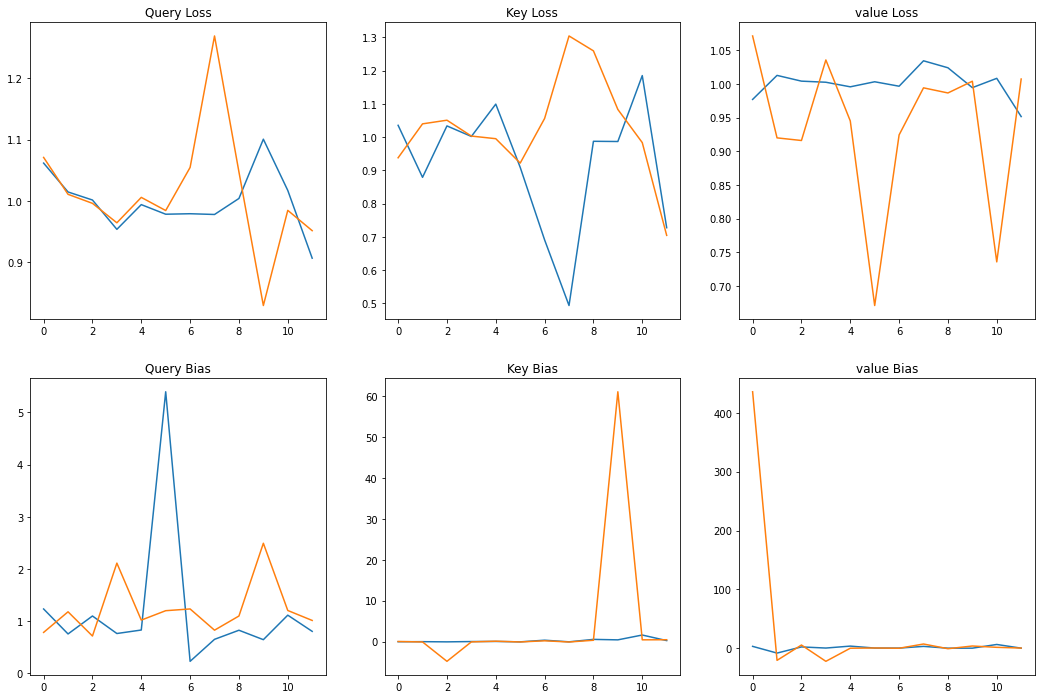

In [10]:
layer_idx = [i for i in range(12)]
matrix_titles = ['Query Loss','Key Loss','value Loss']
bias_titles = ['Query Bias','Key Bias','value Bias']
plt.figure(figsize=(18,12))
for idx in range(1,4):
    plt.subplot(2,3,idx)
    plt.title(matrix_titles[idx-1])
    plt.plot(layer_idx, [value[idx * 2 - 2] for value in m_loss], label='model 1')
    plt.plot(layer_idx, [value[idx * 2 - 1] for value in m_loss], label='model 2')

for idx in range(1,4):
    plt.subplot(2,3,idx+3)
    plt.title(bias_titles[idx-1])
    plt.plot(layer_idx, [value[idx * 2 - 2] for value in b_loss], label='model 1')
    plt.plot(layer_idx, [value[idx * 2 - 1] for value in b_loss], label='model 2')
